# Занятие 5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statsmodels.stats.weightstats as ssw

## Оценка распределений

### Дискретное

In [2]:
N = 10000
sample = np.random.choice([1,2,3,4,5,6], N)
sample

array([1, 3, 5, ..., 1, 4, 4])

In [3]:
# оценим функцию вероятности частотами
unique_values, counts = np.unique(sample, return_counts = True)

print(counts)
print(counts / N)
print(unique_values)
print(np.sum(counts/N))

[1658 1656 1710 1644 1639 1693]
[0.1658 0.1656 0.171  0.1644 0.1639 0.1693]
[1 2 3 4 5 6]
1.0


In [6]:
for N in [10, 100, 1000, 10000, 100000]:
    sample = np.random.choice([1,2,3,4,5,6], N)
    unique_values, counts = np.unique(sample, return_counts = True)
    print(unique_values)
    print("{}: {} {}".format(N, counts/N, np.sum(counts/N)))

[1 2 4 5 6]
10: [0.1 0.3 0.2 0.2 0.2] 1.0
[1 2 3 4 5 6]
100: [0.21 0.1  0.21 0.13 0.17 0.18] 1.0
[1 2 3 4 5 6]
1000: [0.153 0.178 0.178 0.18  0.165 0.146] 0.9999999999999999
[1 2 3 4 5 6]
10000: [0.1641 0.1678 0.1672 0.1627 0.1707 0.1675] 0.9999999999999999
[1 2 3 4 5 6]
100000: [0.16572 0.16748 0.16641 0.16764 0.16413 0.16862] 1.0


In [8]:
1/6

0.16666666666666666

### Непрерывное

In [12]:
# возьмём выборку из нормального распределения
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100)

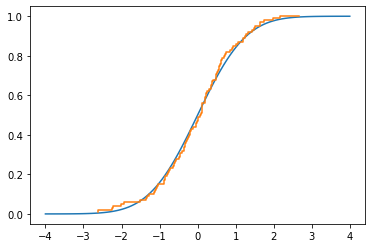

In [22]:
x = np.linspace(-4, 4, 100)
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label = 'Theoretical distribution function')

# Воспользуемся библиотекой для оценки (спасибо питон!)

from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)

plt.step(ecdf.x, ecdf.y, label = 'Estimate distribution function')

[ 3.  2.  9. 13. 21. 24. 14.  8.  4.  2.] [-2.60740289 -2.08024132 -1.55307974 -1.02591817 -0.49875659  0.02840498
  0.55556655  1.08272813  1.6098897   2.13705127  2.66421285] <BarContainer object of 10 artists>


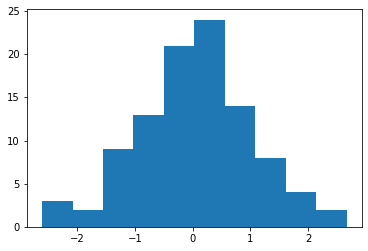

In [23]:
# теперь посмотрим на функцию плотности
b, n, _ = plt.hist(sample)
print(b, n, _)

In [24]:
len(n)

11

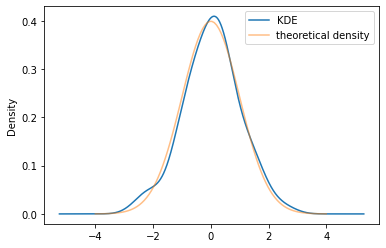

In [28]:
# ядерное сглаживание
# можно сделать в pandas
df = pd.DataFrame(sample, columns = ['KDE'])
ax = df.plot(kind = 'density')

# строим теоретическую плотность
x = np.linspace(-4, 4, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label = 'theoretical density', alpha = 0.5)
plt.legend()

### Предсказательный интервал
Имеем $X \sim N(\mu, \sigma^2)$. Согласно правилу [2-х сигм](https://ru.wikipedia.org/wiki/%D0%A1%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BE%D1%82%D0%BA%D0%BB%D0%BE%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5#%D0%9F%D1%80%D0%B0%D0%B2%D0%B8%D0%BB%D0%BE_%D1%82%D1%80%D1%91%D1%85_%D1%81%D0%B8%D0%B3%D0%BC) имеем $$\mathbf{P}(\mu - 2 \sigma \leq X \leq \mu + 2 \sigma) \approx 0.95$$



Если мы применим данное правило к стандартному нормальному распределению $X \sim N(0,1)$, то получим
$$\mathbf{P}(0 - 2 \cdot 1 \leq X \leq 0 + 2 \cdot 1) \approx 0.95$$

Проиллюстрируем это визуально

In [29]:
# возьмём выборку из стандартного нормального распределения
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100)
sample

array([-1.55056189e+00,  1.03533465e+00,  1.56687087e-01,  4.33234991e-01,
        1.04097479e+00, -1.19948412e-03,  7.26358214e-01, -6.41630681e-01,
       -3.99116081e-01, -7.41578242e-01, -1.02207662e+00,  4.13392665e-01,
       -6.81464175e-01, -1.24001208e-01, -9.20093386e-01,  1.66889533e-02,
       -1.39799591e+00, -3.46180760e-01, -4.70004700e-01,  9.02019009e-01,
       -5.96518798e-01, -6.40089188e-01, -1.36572354e+00, -5.03267032e-01,
        1.25156700e+00,  6.07421564e-01,  1.64754839e-01, -7.77906135e-01,
        4.62669502e-01, -5.39144293e-01, -2.56906758e-01, -1.63339885e+00,
        9.67340543e-01,  7.22733716e-01,  1.26091810e+00,  5.70036943e-01,
       -5.51880029e-01,  8.13436491e-01,  2.46510978e-01, -1.84721895e+00,
        1.95258282e-01, -1.07029006e+00,  1.80581358e+00, -9.41899176e-01,
       -1.10911683e+00,  8.41598589e-02,  2.96569310e-01, -1.46420019e+00,
       -1.20211379e-01,  5.53643936e-02, -1.75904576e-01, -1.15970496e+00,
       -7.34429404e-01,  

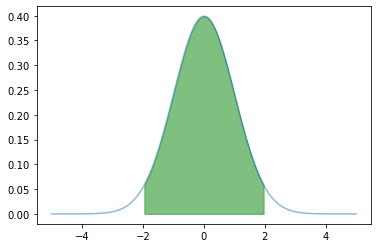

In [41]:
x = np.linspace(-5, 5, 10000)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label = 'theoretical density', alpha = 0.5)
to_fill = np.linspace(-1.96, 1.96, 100)
plt.fill_between(to_fill, norm_rv.pdf(to_fill), alpha = 0.5, color = 'green')

Оценка эта неточная, и не всегда нам нужно именно 0.95 вероятностной массы. 

В общем случае работают с квантилями

In [36]:
norm_rv.ppf(0.25)

-0.6744897501960817

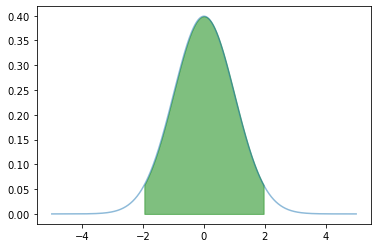

In [48]:
alpha = 0.05
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label = 'theoretical density', alpha = 0.5)
q_a = norm_rv.ppf(alpha/2)
q_b = norm_rv.ppf(1-alpha/2)
to_fill = np.linspace(q_a, q_b, 100)
plt.fill_between(to_fill, norm_rv.pdf(to_fill), alpha = 0.5, color = 'green')

Теперь, если мы хотим найти такой интервал в котором с вероятностью 95% окажется реализация нашей случайной величины, нам лишь нужно найти соответствующие квантили $X_{\frac{\alpha}{2}}$ и $X_{1-\frac{\alpha}{2}}$.

Такой интервал можем найти для произвольно распределенной случайной величины

В частности, для нормально распределенной случайной величины
$$\mathbf{P}(\mu - \zeta_{1-\frac{\alpha}{2}} \sigma \leq X \leq \mu + \zeta_{1-\frac{\alpha}{2}} \sigma) = 1-\alpha$$

$\zeta_{\alpha}$ будем обозначать квантиль порядка $\alpha$ стандартного нормального распределения (то-есть распределения $N(0,1)$). Тут мы воспользовались тем, что $\zeta_{\frac{\alpha}{2}} = - \zeta_{1-\frac{\alpha}{2}}$

$ \zeta_{0.975} \approx 1.95996 \approx 2$



**Предсказательный интервал оценивает диапазон значений**

### Доверительный интервал
Точечные оценки параметров это уже что-то, но также представляет интерес и то, в каком диапазоне изменяются оцениваемые параметры, например, средние значения.

Отвечают на вопрос **в каком диапазоне скорее всего лежит оцениваемый параметр**



Например, снова возьмем выборку из нормального распределения $X^n = (X_1, \dotso, X_n),\ X \sim \mathbf{N}(\mu, \sigma^2)$

Пусть нам известна дисперсия, т.е $\sigma^2$. Тогда по [свойствам](http://www.machinelearning.ru/wiki/index.php?title=%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5) нормального распределения получаем $\sum_{i=1}^{n} X_i \sim \mathbf{N}(n\mu, n\sigma^2) \rightarrow \frac{\sum_{i=1}^{n} X_i}{n} = \overline{X_n} \sim \mathbf{N}(\mu, \frac{\sigma^2}{n})$

По формуле для предсказательного интервала получаем $$\mathbf{P}(\mu - \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} \leq \overline{X_n} \leq \mu + \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}) = 1-\alpha$$

Теперь, переносим $\overline{X_n}$ и $\mu$ в неравенствах, и получаем доверительный интервал для $\mu$

$$\mathbf{P}(\overline{X_n} - \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} \leq \mu \leq \overline{X_n} + \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}) = 1-\alpha$$|

Интервал для N 10 13.407 ... 21.773
Интервал для N 50 8.426 ... 12.168
Интервал для N 100 7.267 ... 9.912
Интервал для N 100000 5.073 ... 5.157


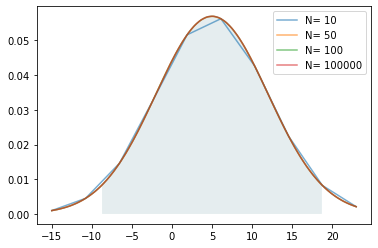

In [56]:
# Задание, 
# 1) сгенерируйте 10, 50, 100 примеров из нормального распределения с произвольными мат ожиданием и дисперсией
# 2) Постройте по формуле интервал с alpha = 0.05
# ваш код тут

mu = 5
sigma = 7
norm_rv = sts.norm(mu, sigma)
alpha = 0.05
N = [10, 50, 100, 100000]

for n in N:
    sample = np.linspace(-15, 23, n)
    pdf = norm_rv.pdf(sample)
    plt.plot(sample, pdf, alpha = 0.6)
    q_a_m = norm_rv.ppf(alpha/2)
    q_a_p = norm_rv.ppf(1 - alpha/2)
    to_fill = np.linspace(q_a_m, q_a_p, 100)
    plt.fill_between(to_fill, norm_rv.pdf(to_fill), alpha = 1/n)
    plt.legend([" ".join(("N=", str(n))) for n in N])
    print("Интервал для N %.f %.3f ... %.3f" % (n, sample[np.argmax(pdf)] - q_a_m * np.sqrt(sigma/n),
                                               sample[np.argmax(pdf)] + q_a_p * np.sqrt(sigma/n)))
